## Astro 330 "Computational Astrophysics"

### Homework 3. Integration of orbits with symplectic integrators (35 points)

#### Distributed Friday, Oct 21; Due Thursday, Oct 27, @7pm

In [2]:
from __future__ import division
from math import cos
import numpy as np
from time import time
from time import clock

from codes.plot_utils import plot_pretty
from matplotlib import pylab as plt
%matplotlib inline

# Total: 32
# Problem 1: 5

<b>1.</b> (5 points) <i> Symplectic integration scheme for a harmonic oscillator.</i> Consider equation governing evolution of a simple harmonic oscillator: $\ddot{x} - x = 0$. Write down a symplectic integration scheme for this system, advancing the system from one moment of time to the next. Show explicitly that the scheme is symplectic and show explicitly that it conserves energy during long term integration.  

In [ ]:
#Solution attached in image below (or in git directory)

In [401]:
![title](/q1_sol.png)

/bin/sh: -c: line 0: syntax error near unexpected token `/q1_sol.png'
/bin/sh: -c: line 0: `[title](/q1_sol.png)'


*** [VS:] Actually, this only shows that the error on the energy is of the second order per step. But this does not mean that in the long term the energy will conserve. Recall RK methods, which also have fixed order of error but, nevertheless, during long term integration this error grows.***

# Problem 2: 17

<b>2.</b> (20 points) <i>Implementing a "direct integration" $N$-body code</i>. 

a. (10 points) Write a routine that takes initial coordinates and velocities of $N$ particles and evolves them forward using a specified constant time step. Set up the calculation in such a way that units can be changed so you can use this routine to integrate different physical systems easily by redefining units at the beginning of the calculation. This means that your evolution routine should be written in abstract code units, which can be defined at the initialization. If you are not sure how to do this, please ask me. Initialize coordinates and velocities before first step half a step from each other using 1st order Euler scheme. How you do this depends whether you choose KDK or DKD stepping sequence (see S 1.4.5 in the notes).

The evolution code should consist of a loop sweeping through all particles at each step.
For each particle acceleration is computed by direct summation of forces from all other particles and use it to advance positions of particles. This calculation generally requires another loop over all particles (which is what makes this problem scale as $N^2$). In python this second sweep can be done via vector operation, i.e. without explicit loop. You can see examples of how to compute accelerations for a given body at the end of <a href="https://github.com/a-kravtsov/a330f16/blob/master/ex04.ipynb">ex04.ipynb</a>. 
Examples there include both explicit implementation using loops and vectorized calculation of accelerations. You can use these routines, but make sure you adjust them to use your code unit system.

After acceleration is computed, implement update of coordinates and velocities using the 2nd order symplectic integrator (KDK or DKD, see S 1.4.5 in the notes) to complete the step. After you complete the routine, test it by integrating a two body system: the Sun and the Earth with their true masses and with Earth on circular orbit. Check that orbit radius is stable and check conservation of energy. Compare results to results of your calculation in HW2 using RK solver. 



In [123]:
# number of dimensions, number of particles
D = 2; N = 5; 


def remove_i(x, i):
    """Drops the ith element of an array."""
    shape = (x.shape[0]-1,) + x.shape[1:]
    y = np.empty(shape, dtype=float)
    y[:i] = x[:i]
    y[i:] = x[i+1:]
    return y

def accvec2(i, x, G, m, epsilon):  #Added epsilon softening now
    """The acelleration of the ith mass."""
    x_i = x[i]
    x_j = remove_i(x, i)
    m_j = remove_i(m, i)
    
    #diff = x_j - x_i
    diff = x_j - x_i + epsilon
    
    mag3 = np.sum(diff**2, axis=1)**1.5
    result = G * np.sum(diff * (m_j / mag3)[:,np.newaxis], axis=0)
    return result



def leapfrog(f,x0,v0,t0,t_end,dt,G,m,epsilon):
    
    x1, t, v1 = np.copy(x0), t0, np.copy(v0);
    
    tout = [t] 
    xout = [np.copy(x1)] 
    vout = [np.copy(v1)]
  

    while t < t_end: #Looping over time steps
        
        #print 't is', t 
        for i in range(N):    #Looping over number of particles
            
            #print i              #Snippet that uses half steps in time
            #v1[i] -= 0.5*dt*f(i,x1,G,m,epsilon)
            #print 'velocity is', v[i]
            #x1[i] += dt*v1[i]
            #v[i] = v[i] + 0.5*dt*accel(i,x,G,m,epsilon)
            #print 'position is', x[i]
                
            #
            #The code below gives integer steps to velocity too
            #
            
            f_old = f(i,x1,G,m,epsilon)
            x1[i] += dt*v1[i] + 0.5*f_old*(dt**2)
            v1[i] += 0.5*dt*(f(i,x1,G,m,epsilon) + f_old)
            
        #print 'position is', x1    
           
            tout.append(np.copy(t)); xout.append(np.copy(x1)); vout.append(np.copy(v1))
        t += dt
        
        
    #print 'POS is', xout 
    return np.asarray(tout), np.asarray(xout), np.asarray(vout)
        
#
#Initial Conditions
#
 





m0 = 1.989e30 #kg
t0 = 3.154e+7 #1 year (in seconds)
r0 = 1.496e+11 #1 AU (in meters)

epsilon =1e-6

x0 = np.random.rand(N, D)
#x0 /= r0

v0 = np.zeros((N, D), dtype=float)
v0 /= (r0/t0)

m = np.ones(N, dtype=float)
#m /= m0

G = 6.67e-11 #SI units
G /= r0**3/(m0*(t0**2))   # G_tilda = G/(r0^3/m0.t0^2)
print G
print m
print v0
print x0

t_start=0
t_end = 2  # in Years (t0) units
dt=1e-3

tstart = clock()
time,position,velocity = leapfrog(accvec2,x0,v0,t_start,t_end,dt,G,m,epsilon)
print "accvec2 completed in %.2f seconds"%(clock()-tstart)





39.4175125385
[ 1.  1.  1.  1.  1.]
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[[ 0.5952593   0.75362984]
 [ 0.69762074  0.72787855]
 [ 0.65933991  0.26374868]
 [ 0.81048577  0.26815828]
 [ 0.82338992  0.27515888]]
accvec2 completed in 0.82 seconds


*** [VS:] This does not look like 2nd order symplectic scheme. Kick and drift steps must be applied to all particles at once. However, you apply your DK steps to particles consequentially, one after another. So, to update the position and velocity of particle with index $i=I$ from step $n$ to step $n+1$ you take solution from step $n+1$ for all particles with $i<I$ and solution form step $n$ for all particles $i \geq I$. By doing this you most likely loose order of your scheme. (-3)  ***

In [124]:
r = []
#for t in range(0,len(time)-1):
#    for i in range(0,N-1):
#        r.append(np.linalg.norm(position[t,0,i]))
    
r = np.asarray(r)
print position.shape
#print r.shape
print time.shape

print position[20,:,:]
print position[15,:,:]
print position[10,:,:]
#print position[:,1,0], position[:,1,1]

(10006, 5, 2)
(10006,)
[[ 0.63002132  0.74193368]
 [ 0.65757869  0.73391572]
 [ 0.6796083   0.26821541]
 [ 1.10163625  0.43164326]
 [ 0.83703642  0.29105783]]
[[ 0.61271897  0.74756762]
 [ 0.6795617   0.73014331]
 [ 0.67149483  0.26619506]
 [ 1.03252034  0.39211974]
 [ 0.8341451   0.28581789]]
[[ 0.6025957   0.751033  ]
 [ 0.69031951  0.72869498]
 [ 0.66519756  0.26479081]
 [ 0.96225902  0.35233968]
 [ 0.83011952  0.28098618]]


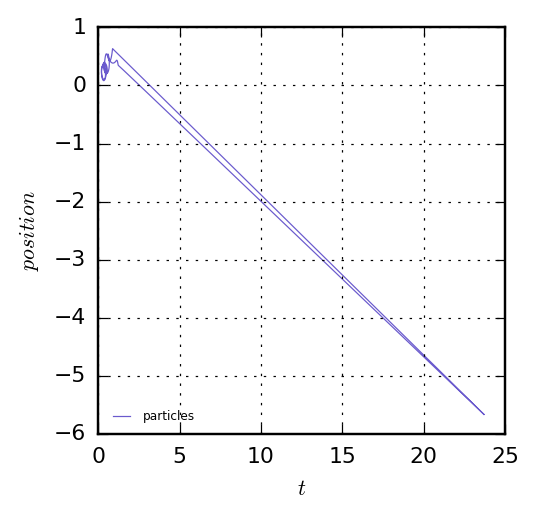

In [98]:
#Testing orbits of single particles

plot_pretty()
#plt.xscale('log'); plt.yscale('log')
#plt.xlim(t0+1.e-6,tf); plt.ylim(y0+1.e-6,3.)
plt.figure(figsize=(3,3))
plt.xlabel('$t$'); plt.ylabel('$position$')
plt.plot(position[:,3,0], position[:,3,1] , lw=0.5, c='slateblue', alpha=1., label='particles')
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.grid()
plt.legend(frameon=False, loc='lower left', fontsize=5)   
plt.show()

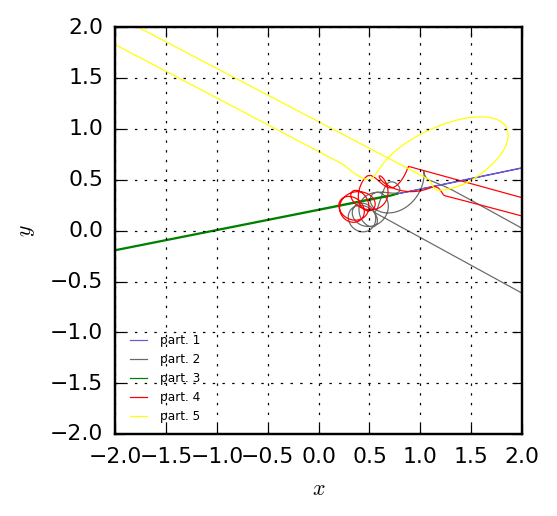

In [100]:
#Plotting snapshots 

c = ['slateblue', 'dimgrey', 'green', 'red','yellow']

plot_pretty()
#plt.xscale('log'); plt.yscale('log')
#plt.xlim(t0+1.e-6,tf); plt.ylim(y0+1.e-6,3.)
plt.figure(figsize=(3,3))
plt.xlabel('$x$'); plt.ylabel('$y$')

for i in range(N):
    plt.plot(position[:,i,0], position[:,i,1] , lw=0.5, c=c[i], alpha=1., label='part. %s'%(i+1))
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.grid()
plt.legend(frameon=False, loc='lower left', fontsize=5)   
plt.show()

In [272]:
#Earth-Sun system

N=2; D=3

m0 = 1.989e30 #kg
t0 = 3.154e+7 #1 year (in seconds)
r0 = 1.496e+11 #1 AU (in meters)

epsilon =1e-6

x0 = np.zeros((N,D))
x0[0,0]=1; #x=r0,y=0,z=0
v0 = np.zeros((N,D))
v0[0,1]=2*np.pi
m = np.array([3.0034896149157645e-6,1])

G = 6.67e-11 #SI units
G /= r0**3/(m0*(t0**2))

t_start=0
t_end = 40  # in Years (t0) units
dt=1e-3

tstart = clock()
time,position,velocity = leapfrog(accvec2,x0,v0,t_start,t_end,dt,G,m,epsilon)
print "accvec2 completed in %.2f seconds"%(clock()-tstart)


accvec2 completed in 6.73 seconds


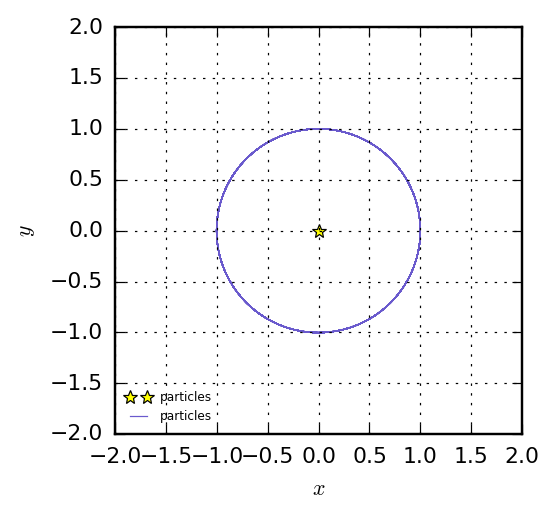

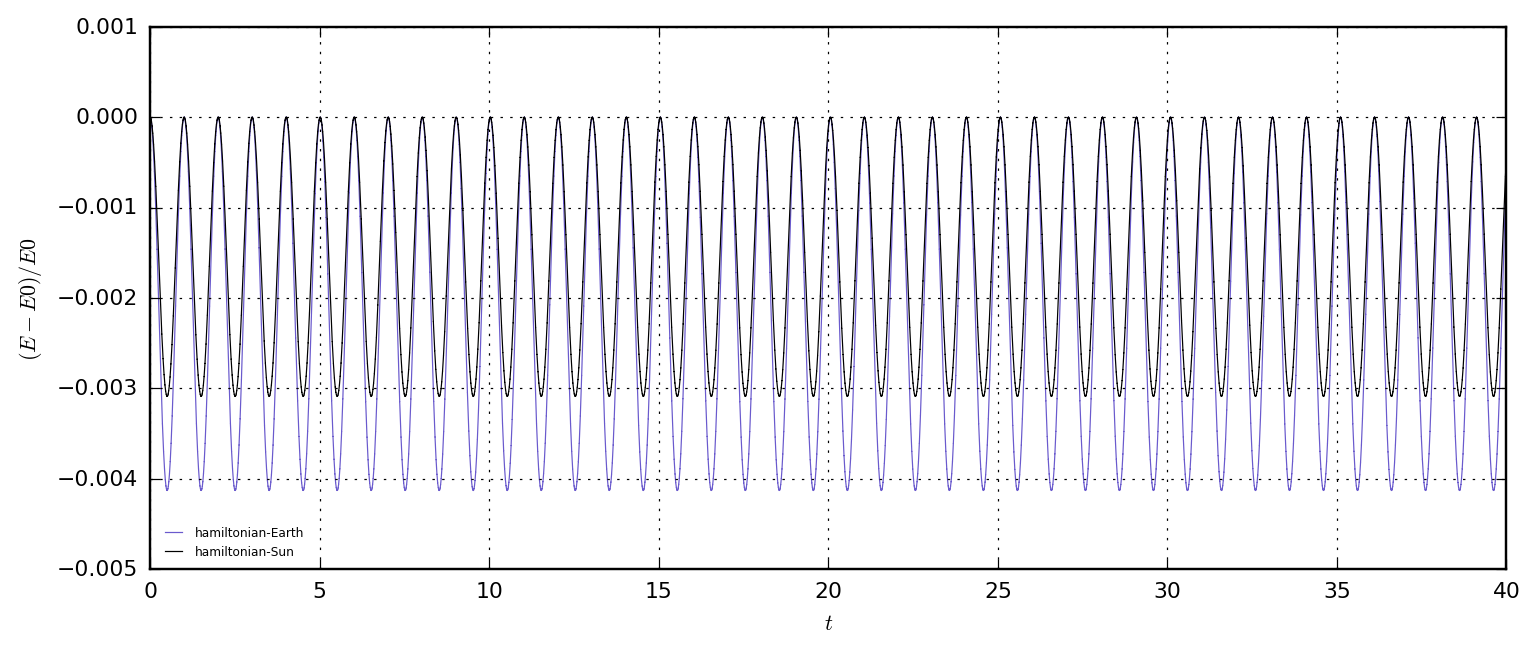

In [273]:
plot_pretty()
#plt.xscale('log'); plt.yscale('log')
#plt.xlim(t0+1.e-6,tf); plt.ylim(y0+1.e-6,3.)
plt.figure(figsize=(3,3))
plt.xlabel('$x$'); plt.ylabel('$y$')
plt.plot(position[0,1,0], position[0,1,1],'*', lw=0.5, c='yellow', alpha=1., label='particles')
plt.plot(position[:,0,0], position[:,0,1] , lw=0.5, c='slateblue', alpha=1., label='particles')
plt.xlim(-2,2); plt.ylim(-2,2)
plt.grid()
plt.legend(frameon=False, loc='lower left', fontsize=5)   
plt.show()

#Energies
dist = np.linalg.norm(position[:,0,:] - position[:,1,:],axis=1)
dist_sun = np.linalg.norm(position[:,0,:] - position[:,1,:],axis=1)

velocity_norm = np.linalg.norm(velocity[:,0,:],axis=1)
velocity_norm_sun = np.linalg.norm(velocity[:,1,:],axis=1)

energy = G*m[1]/dist + 0.5*velocity_norm**2
energy_sun = G*m[0]/dist_sun + 0.5*velocity_norm_sun**2

plot_pretty()
#plt.xscale('log'); plt.yscale('log')
#plt.xlim(t0+1.e-6,tf); plt.ylim(y0+1.e-6,3.)
plt.figure(figsize=(10,4))
plt.xlabel('$t$'); plt.ylabel('$(E-E0)/E0$')
plt.plot(time, (energy - energy[0])/energy[0], lw=0.5, c='slateblue', alpha=1., label='hamiltonian-Earth')
plt.plot(time, (energy_sun - energy_sun[0])/energy_sun[0], lw=0.5, c='black', alpha=1., label='hamiltonian-Sun')
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.grid()
plt.legend(frameon=False, loc='lower left', fontsize=5)   
plt.show()

Energy is being conserved here to some order, as opposed to the RK2 solver in the previous homework where energy loss was transpiring. It can be seen from the figure above.

b. (10 points) Although the outer loop sweeping over particles during each step cannot be vectorized in $N$-body problem, it can be parallelized. Think about how you would parallelize the your serial $N$-body evolution and implement it using MPI (note that this is still an "embarassingly parallel" problem and its parallelization can be as simple as that in numerical integration). Create a separate parallel evolution routine - different from the serial routine implemented above - but reusing common routines. Test it by setting up a system of particles with random coordinates and velocities (say for $N=100$ or $N=1000$). Integrate the system for a few hundred steps. Present results of tests and scaling of the problem on different number of cores either on your laptop or on midway, where you can go up to 16 cores on a single node.

<b>A note on optimization.</b> Python is an interpreted language, so it runs slowly, as interpeter analyzes and executes the code line by line. The seemingly simple and little (it involves just a few dozen lines of code) $N$-body problem of integrating just 10 bodies (Sun and planets) in problem 4 below for a billion years is where python gets defeated regardless of how you try to optimize or parallelize it. Here you may think about switching to a compiled language like C to do the calculation for this task and the one below for the star cluster. Coding of this problem is sufficiently simple that you should be able to do it even if you've never programmed in a language before, just by reading up about how to do basic things in that language.

If you stick with python, you can use python code to integrate evolution of systems in 4 and 5 for a limited number of steps. You can also speed up this calculation by a factor of several by parallelizing it and running on 8 or 16 cores on the midway cluster. 

In [ ]:
import numpy as np
from mpi4py import MPI as mpi
import string
import sys
import time
import matplotlib.pyplot as plt
from time import clock


comm = mpi.COMM_WORLD
mpi_rank, mpi_size = comm.Get_rank(), comm.Get_size()

###################################################



def remove_i(x, i):
    """Drops the ith element of an array."""
    shape = (x.shape[0]-1,) + x.shape[1:]
    y = np.empty(shape, dtype=float)
    y[:i] = x[:i]
    y[i:] = x[i+1:]
    return y

def accvec2(i, x, G, m, epsilon):  #Added epsilon softening now
    """The acelleration of the ith mass."""
    x_i = x[i]
    x_j = remove_i(x, i)
    m_j = remove_i(m, i)
    
    #diff = x_j - x_i
    diff = x_j - x_i + epsilon
    
    mag3 = np.sum(diff**2, axis=1)**1.5
    result = G * np.sum(diff * (m_j / mag3)[:,np.newaxis], axis=0)
    return result

###################################

# number of dimensions, number of particles
D = 3; N = 800; 

#Initial Conditions

m0 = 1.989e30 #kg
t0 = 3.154e+7 #1 year (in seconds)
r0 = 1.496e+11 #1 AU (in meters)

epsilon =1e-6

x0 = np.random.rand(N, D)
v0 = np.zeros((N, D), dtype=float)
v0 /= (r0/t0)

m = np.ones(N, dtype=float)

G = 6.67e-11 #SI units
G /= r0**3/(m0*(t0**2))   # G_tilda = G/(r0^3/m0.t0^2)
#print G
#print m
#print v0
#print x0

t_start=0
t_end = 1  # in Years (t0) units
dt=0.01

timearray = np.arange(t_start,t_end,dt)

t=0

tstart = clock()
#time,position,velocity = leapfrog_mpiversion(accvec2, x0, v0,t_start, t_end, dt, G, m, epsilon)
##################################
    
if mpi_rank==0: 
    xvec = []; vvec=[]

h = N/mpi_size

while t < t_end: #Looping over time steps
    
    localv = np.zeros((h,D))
    localx = np.zeros((h,D))
    comm.Scatter(v0, localv, root=0)
    comm.Scatter(x0, localx, root=0)
     
    N_val = np.arange(mpi_rank*h, (mpi_rank+1)*h, dtype=int)
    
    for i,n in enumerate(N_val):    #Looping over number of particles per node
        #The code below gives integer steps to velocity too
        f_old = accvec2(n,x0,G,m,epsilon)
        localx[i] += dt*localv[i] + 0.5*f_old*(dt**2)
        x0[n] = localx[i]
        localv[i] += 0.5*dt*(accvec2(n,x0,G,m,epsilon) + f_old)
        
    x0 = np.zeros((N,D),dtype=float)
    v0 = np.zeros((N,D),dtype=float)
    comm.Allgather(localv, v0)
    comm.Allgather(localx, x0)
    comm.Barrier()

    if mpi_rank==0:
        xvec.append(np.copy(x0))
        vvec.append(np.copy(v0))
        
    
    t += dt

if mpi_rank==0:
    print "accvec2 completed in %.2f seconds"%(clock()-tstart)
    xout = np.asarray(xvec)
    vout = np.asarray(vvec)
#
# Plotting routine
#
#c = ['slateblue', 'dimgrey', 'green', 'red','yellow']
#plt.xscale('log'); plt.yscale('log')
#plt.xlim(t0+1.e-6,tf); plt.ylim(y0+1.e-6,3.)
    plt.figure(figsize=(3,3))
    plt.xlabel('$x$'); plt.ylabel('$y$')

    for i in range(N):
        plt.plot(xout[:,i,0], xout[:,i,1] , lw=0.75, c='slateblue', alpha=1., label='part. %s'%(i+1))
    plt.xlim(-2,2); plt.ylim(-2,2)
    plt.grid()
    plt.legend(frameon=False, loc='lower left', fontsize=5)   
#plt.show()
    plt.savefig('orbits_hw3_nbody.pdf')



*** [VS:] Note that Scatter and Gather in python work only when the size of the array is divisible by the number of MPI tasks. So, this condition must be checked explicitly. ***

In [ ]:


#We can parallelize different particles. N can be divided into N/M processes

#Parallelization will happen in the loop (for i in range(N): calculate stuff for specific timestep)



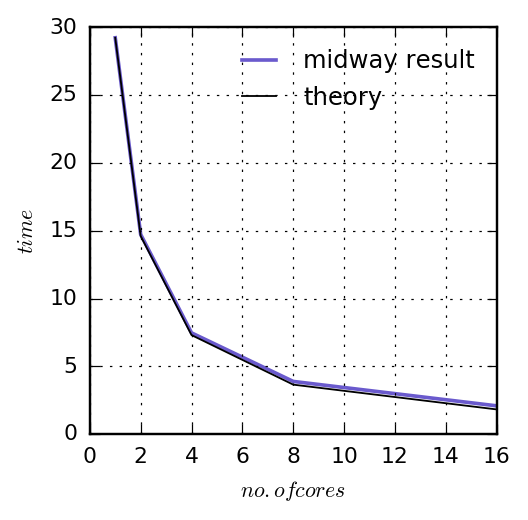

In [338]:
#Results from midway
from __future__ import division

cores = np.array([1,2,4,8,16])
time_800part = np.array([29.23,14.73,7.47,3.89,2.09])

theor = lambda x: 1/x

plot_pretty()
#plt.xscale('log'); plt.yscale('log')
#plt.xlim(t0+1.e-6,tf); plt.ylim(y0+1.e-6,3.)
plt.figure(figsize=(3,3))
plt.xlabel('$no. of cores$'); plt.ylabel('$time$')
plt.plot(cores,time_800part, lw=1.5, c='slateblue', alpha=1., label='midway result')
plt.plot(cores, theor(cores)*time_800part[0] , lw=0.75, c='black', alpha=1., label='theory')
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.grid()
plt.legend(frameon=False, loc='upper right', fontsize=10)   
plt.show()



# Problem 3: 5

<b>3. (5 points)</b> <i> Integrating orbits of planets around GJ 876.</i> GJ876 is a red dwarf star for which a series of precise radial motion measurements exists. Modelling of these motions indicates that it has at least two planets (quite likely three) orbiting around it. The two planets have periods of $\approx 60$ and $\approx 30$ days and are locked in a 2:1 mean motion resonance. 
Cartesian coordinates, velocities, and masses of the stars for one of the best fitting models are presented in Table 3 of <a href="http://adsabs.harvard.edu/abs/2005ApJ...622.1182L">Laughlin et al. 2005</a> and are available in this <a href="https://github.com/a-kravtsov/a330f16/blob/master/data/gj876.dat">file.</a> The code snippet below reads it.
Let's see if the 2nd order symplectic integrators we've discussed are good enough to reproduce the main results of this paper. 

Initialize the three body system (star and two planets) with these coordinates and velocities as initial conditions, choosing suitable units: e.g., 1 AU as the unit of distance and $M_{\odot}$ as mass unit, day as a unit of time. Integrate them forward for 3320 days with the $N$-body code you implemented in 2. (This problem is simple and fast and does not require parallelization. So you can use the serial version of your routine). 

Output positions and velocities of the planets and the star every half day from the start. Plot positions of the planets at the half day intervals from the start and compare to the figure 1 in Laughlin et al. 2005. Plot the radial velocity of the star (velocity in the 1D velocity in the plane of the planet orbits) as a function of time. Compare to Fig 2 in Laughlin et al. Can you reproduce the figures? Comment on what these figures show. 

In [218]:
from codes.setup import data_home_dir
# reading initial planet positions from Table 3 of Laughlin et al. 2005
name = np.loadtxt(data_home_dir()+'gj876.dat', usecols=[0], unpack=True, dtype=str)
mp, xp, yp, zp, vxp, vyp, vzp = np.loadtxt(data_home_dir()+'gj876.dat',\
                                           usecols=(1,2,3,4,5,6,7), unpack=True)
print name, mp, xp, yp, zp, vxp, vyp, vzp

['Star' 'Planetc' 'Planetb'] [  6.36515181e+32   1.13341374e+30   3.59700414e+30] [  0.00000000e+00  -1.37393700e+12   2.89833447e+12] [  0.00000000e+00   6.61857760e+11  -1.34857660e+12] [ 0.  0.  0.] [   -3974.15664 -2532174.78     1501141.65   ] [   -9012.47643 -5262209.95     3252940.14   ] [ 0.  0.  0.]


In [219]:
print mp[1]

1.13341374e+30


In [249]:
m0 = 1.989e30 # 1 M_solar(in kilograms)
t0 = 86400 #1 day (in seconds)
r0 = 1.496e+11 #1 AU (in metres)

N=3;D=3
epsilon =1e-5

x=np.zeros((N,D))
v=np.zeros((N,D))



x[:,0]=xp;x[:,1]=yp;x[:,2]=zp
v[:,0]=vxp;v[:,1]=vyp;v[:,2]=vzp
    
print 'v0 is', r0/t0
x *= 0.01 #cm to metres
x /= r0

v *= 0.01 #cm/s to m/s
v /= (r0/t0)

m = np.copy(mp)
m *=0.001 # grams to kilograms
m /= m0

print m
print v

G = 6.67e-11 #SI units
G /= r0**3/(m0*(t0**2))
print G

t_start=0
t_end = 3320  # in days (t0) units
dt=0.5

print x

v0 is 1731481.48148
[ 0.32001769  0.00056984  0.00180845]
[[ -2.29523485e-05  -5.20506660e-05   0.00000000e+00]
 [ -1.46243249e-02  -3.03913730e-02   0.00000000e+00]
 [  8.66969509e-03   1.87870340e-02   0.00000000e+00]]
0.000295796697854
[[ 0.          0.          0.        ]
 [-0.09184071  0.04424183  0.        ]
 [ 0.19373894 -0.09014549  0.        ]]


In [250]:
tstart = clock()
time3,position3,velocity3 = leapfrog(accvec2,x,v,t_start,t_end,dt,G,m,epsilon)
print "accvec2 completed in %.2f seconds"%(clock()-tstart)

accvec2 completed in 1.56 seconds


In [251]:
print position3[15000,1,2]

0.00883760870953


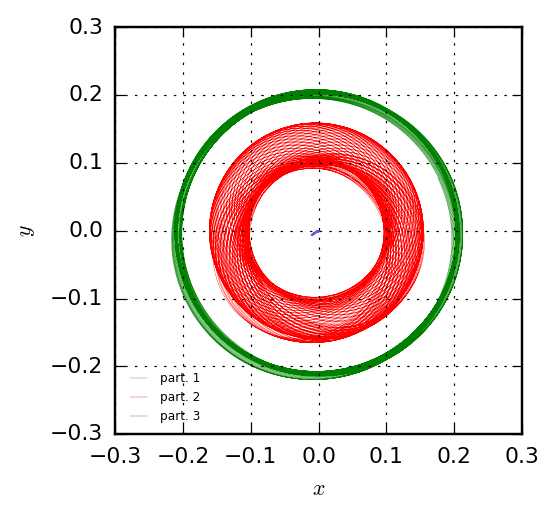

In [252]:
c = ['slateblue', 'red', 'green']


plot_pretty()
#plt.xscale('log'); plt.yscale('log')
#plt.xlim(t0+1.e-6,tf); plt.ylim(y0+1.e-6,3.)
plt.figure(figsize=(3,3))
plt.xlabel('$x$'); plt.ylabel('$y$')

for i in range(N):
    plt.plot(position3[:,i,0], position3[:,i,1] , lw=0.15, c=c[i], alpha=1., label='part. %s'%(i+1))
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.grid()
plt.legend(frameon=False, loc='lower left', fontsize=5)   
plt.show()

A slight precession can be seen in the particle2 orbit, similar to the figure in the paper. A precession axis and its motion can possibly be calculated from this.

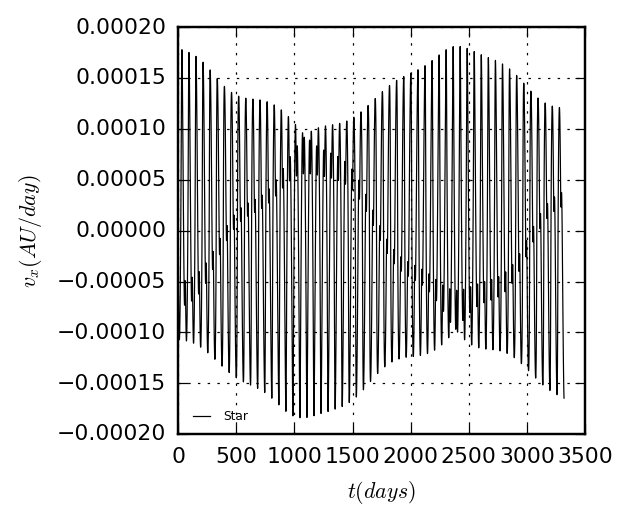

In [255]:
plot_pretty()
#plt.xscale('log'); plt.yscale('log')
#plt.xlim(t0+1.e-6,tf); plt.ylim(y0+1.e-6,3.)
plt.figure(figsize=(3,3))
plt.xlabel('$t (days)$'); plt.ylabel('$v_x (AU/day)$')
plt.plot(time, velocity3[:,0,1] , lw=0.5, c='black', alpha=1., label='Star')
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.grid()
plt.legend(frameon=False, loc='lower left', fontsize=5)   
plt.show()

Radial velocity vs t from my model roughly matches that of the paper. Due to the oscillation in energy (loss of symplecticity) and exchange of energy between different physical velocity components, v_x has oscillations.

*** [VS:] The pattern you see is mostly due to interaction with planets. The difference to Laughlin et al. 2005 paper might be due to the problem with your scheme that I mentioned above. ***

# Problem 4: 5

<b>4. (5 points)</b> <i>Long term integration of orbits of planets in the solar system.</i> Use the coordinates and velocities of the solar system planets  in the file <a href="https://github.com/a-kravtsov/a330f16/blob/master/data/planets.dat"><tt>data/planets.dat</tt></a>  in the repository as initial conditions. The code snippet below shows how to read them. Evolve the Sun and the planets using the $N$-body evolution code you've implemented for as long as you can. Here you can use parallel version to speed things up. 

a. Monitor total energy of the entire system (including the Sun) and distances of the planets to the Sun. Plot these as a function time for suitable time intervals (say outputing every 10 years). Try integrating for 1000 or 10000 yrs first and examine the behavior of total energy and distances to the Sun as a function of time. If the behavior is stable, try integrate for much longer periods of time. Comment on the stability of the solar system based on results of your experiment. Was it possible for you to explore stability over a billion year time scale?

b. Plot $x$ and $y$ positions of the Sun as a function of time (i.e., its motion in the solar plane) for a period of time that would allow to see how the Sun moves (i.e., not over-crowing the plot). What do you see? Comment on what's going on. Take a look at orbit of Mercury - the planet with the largest ellipticity for a few orbital periods. Does the phase of the ellipse stay the same? Comment on the result. How would you explain it?


In [342]:
import numpy as np
from codes.setup import data_home_dir
# read positions of the Sun and 9 planets at a moment in not so distant past...
# units: [positions]=[AU] [velocities]=[AU/day]
name = np.loadtxt(data_home_dir()+'planets.dat', usecols=[0], unpack=True, dtype=str)
mp, xp, yp, zp, vxp, vyp, vzp = np.loadtxt(data_home_dir()+'planets.dat', usecols=(1,2,3,4,5,6,7), unpack=True)
print name, mp, xp, yp, zp, vxp, vyp, vzp

['MERCURY' 'VENUS' 'EARTH' 'MARS' 'JUPITER' 'SATURN' 'URANUS' 'NEPTUNE'
 'PLUTO' 'SUN'] [  1.66013680e-07   2.44783834e-06   3.04043264e-06   3.22715145e-07
   9.54791938e-04   2.85885981e-04   4.36624404e-05   5.15138902e-05
   7.39644970e-09   1.00000000e+00] [ -3.86050847e-01  -2.14010080e-01   5.35527126e-01   1.09184912e+00
  -3.49052855e+00  -5.58775550e+00   1.93504968e+01   2.74781931e+01
   7.26951759e+00   2.66834539e-03] [ -1.55568598e-01  -6.93820243e-01   8.31190625e-01  -8.55123986e-01
   3.99373810e+00  -8.21991042e+00   5.09863735e+00  -1.19655388e+01
  -3.19225425e+01  -1.06975299e-03] [  2.29070985e-02   2.87678885e-03  -1.62113878e-04  -4.47612425e-02
   6.14420124e-02   3.65307464e-01  -2.31755357e-01  -3.86855636e-01
   1.31313636e+00  -1.33058601e-04] [  4.57643579e-03   1.91708282e-02  -1.47681412e-02   9.17276723e-03
  -5.77186746e-03   4.30968034e-03  -1.03085015e-03   1.23196567e-03
   3.12406160e-03   4.25486360e-06] [ -2.49214023e-02  -6.11721925e-03   9.222

In [376]:
import numpy as np
from mpi4py import MPI as mpi
import string
import sys
import time
import matplotlib.pyplot as plt
from time import clock
import cPickle

comm = mpi.COMM_WORLD
mpi_rank, mpi_size = comm.Get_rank(), comm.Get_size()

###################################################

def remove_i(x, i):
    """Drops the ith element of an array."""
    shape = (x.shape[0]-1,) + x.shape[1:]
    y = np.empty(shape, dtype=float)
    y[:i] = x[:i]
    y[i:] = x[i+1:]
    return y

def accvec2(i, x, G, m, epsilon):  #Added epsilon softening now
    """The acelleration of the ith mass."""
    x_i = x[i]
    x_j = remove_i(x, i)
    m_j = remove_i(m, i)
    
    #diff = x_j - x_i
    diff = x_j - x_i + epsilon
    
    mag3 = np.sum(diff**2, axis=1)**1.5
    result = G * np.sum(diff * (m_j / mag3)[:,np.newaxis], axis=0)
    return result

###################################


m0 = 1.989e30 # 1 M_solar(in kilograms)
t0 = 86400 #1 day (in seconds)
r0 = 1.496e+11 #1 AU (in metres)

N=10;D=3
epsilon =1e-5

x=np.zeros((N,D))
v=np.zeros((N,D))

name = np.loadtxt('planets.dat', usecols=[0], unpack=True, dtype=str)
mp, xp, yp, zp, vxp, vyp, vzp = np.loadtxt('planets.dat', usecols=(1,2,3,4,5,6,7), unpack=True)
#print name, mp, xp, yp, zp, vxp, vyp, vzp


x[:,0]=xp;x[:,1]=yp;x[:,2]=zp   #AU
v[:,0]=vxp;v[:,1]=vyp;v[:,2]=vzp #AU/day
    
print 'v0 is', r0/t0
#x *= 0.01 #cm to metres
#x /= r0

#v *= 0.01 #cm/s to m/s
#v /= (r0/t0)

m = np.copy(mp)
#m *=0.001 # grams to kilograms
#m /= m0    #Solar masses

G = 6.67e-11 #SI units
G /= r0**3/(m0*(t0**2))
print G

t_start=0
t_end = 1000*365  # in days (t0) units
dt=5    #5 days per integration


timearray = np.arange(t_start,t_end,dt)

t=0
x1 =np.copy(x)
v1 = np.copy(v)





ImportError: No module named mpi4py

In [ ]:
tstart = clock()
#time,position,velocity = leapfrog_mpiversion(accvec2, x0, v0,t_start, t_end, dt, G, m, epsilon)
##################################
    
if mpi_rank==0: 
    xvec = []; vvec=[]

h = N/mpi_size

while t < t_end: #Looping over time steps
    
    localv = np.zeros((h,D))
    localx = np.zeros((h,D))
    comm.Scatter(v1, localv, root=0)
    comm.Scatter(x1, localx, root=0)
     
    N_val = np.arange(mpi_rank*h, (mpi_rank+1)*h, dtype=int)
    
    for i,n in enumerate(N_val):    #Looping over number of particles per node
        #The code below gives integer steps to velocity too
        f_old = accvec2(n,x1,G,m,epsilon)
        localx[i] += dt*localv[i] + 0.5*f_old*(dt**2)
        x1[n] = localx[i]
        localv[i] += 0.5*dt*(accvec2(n,x1,G,m,epsilon) + f_old)
        
    x1 = np.zeros((N,D),dtype=float)
    v1 = np.zeros((N,D),dtype=float)

    comm.Allgather(localv, v1)
    comm.Allgather(localx, x1)
    comm.Barrier()

    if mpi_rank==0:
        xvec.append(np.copy(x1))
        vvec.append(np.copy(v1))
        
    t += dt


if mpi_rank==0:
    print "accvec2 completed in %.2f seconds"%(clock()-tstart)
    xout = np.asarray(xvec)
    vout = np.asarray(vvec)
    
    # Plotting routine
#

    c = ['slateblue', 'red', 'green','dimgrey','yellow','magenta','blue','black','brown','cyan']
#plt.xscale('log'); plt.yscale('log')
#plt.xlim(t0+1.e-6,tf); plt.ylim(y0+1.e-6,3.)
    plt.figure(figsize=(3,3))
    plt.xlabel('$x$'); plt.ylabel('$y$')
    for i in range(N):
        plt.plot(xout[:,i,0], xout[:,i,1] , lw=0.15, c=c[i], alpha=1., label='part. %s'%(i+1))
    plt.grid()
    plt.legend(frameon=False, loc='lower left', fontsize=5)   
    #plt.show()
    plt.savefig('orbits_hw3_ques4.pdf')


     f1 = [xvec,vvec]
    f = open('orbitsdata_q4.dat','wb')
    cPickle.dump(f1,f)

#Pickled output in the cell below

In [ ]:
#Energy 

#dist = np.linalg.norm(position4[:,0,:] - position4[:,1,:],axis=1)
#dist_sun = np.linalg.norm(position[:,0,:] - position[:,1,:],axis=1)

#for i in range(N):
#    velocity_norm[i] = np.linalg.norm(velocity[:,i,:],axis=1)


#energy = G*m[1]/dist + 0.5*velocity_norm**2
#energy_sun = G*m[0]/dist_sun + 0.5*velocity_norm_sun**2

In [320]:
import cPickle

f1 = open('orbitsdata_q4.dat','rb')
p = cPickle.load(f1)
f1.close()

p1=np.array(p)

print p1[0].shape



(36500, 10, 3)


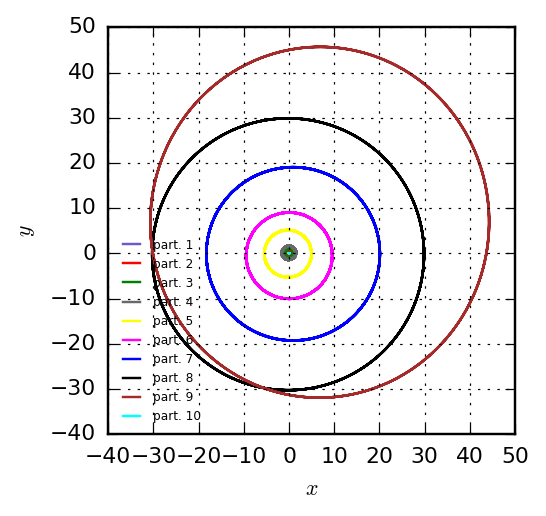

In [327]:
N=10

plot_pretty()
c = ['slateblue', 'red', 'green','dimgrey','yellow','magenta','blue','black','brown','cyan']
#plt.xscale('log'); plt.yscale('log')
#plt.xlim(t0+1.e-6,tf); plt.ylim(y0+1.e-6,3.)
plt.figure(figsize=(3,3))
plt.xlabel('$x$'); plt.ylabel('$y$')
for i in range(N):
    plt.plot(p1[0][:,i,0], p1[0][:,i,1] , lw=1, c=c[i], alpha=1., label='part. %s'%(i+1))
plt.grid()
plt.legend(frameon=False, loc='lower left', fontsize=5)   
plt.show()

In [362]:
#Energy calculations

timelist = np.arange(0,1000*365,365)
print timelist.shape

velocities = p[1]
positions = p[0]
m = np.copy(mp)

velocity_norm=[]
for i in range(N):
    velocity_norm.append(np.linalg.norm(velocities[:,i,:],axis=1))

velocity_norm = np.array(velocity_norm)
print velocity_norm.shape

def energy_particle_nbody(i, x, G, m, epsilon):  
#Energy of i'th mass
    x_i = x[i]
    x_j = remove_i(x, i)
    m_j = remove_i(m, i)
    
    #diff = x_j - x_i
    diff = x_j - x_i + epsilon
    
    mag3 = np.sum(diff**2, axis=1)**0.5
    result = G * np.sum((m_j / mag3)[:,np.newaxis], axis=0)
    return result


energy = np.zeros((len(timelist),N))

for i in range(N):    
    #energy += -1*energy_particle_nbody(i,positions,G,m,epsilon) + 0.5*m[i]*(velocity_norm[i,:]**2)
    for j in range(len(timelist)):
        velocity_norm = np.sqrt(velocities[j,i,0]**2 + velocities[j,i,1]**2 + velocities[j,i,2]**2)
        E = 0.5*m[i]*velocity_norm**2 - m[i]*energy_particle_nbody(i,positions[j],G,m,epsilon)
        energy[j][i] = E
 
total =0
for i in range(N):
    total += energy[:,i]

(1000,)
(10, 36500)


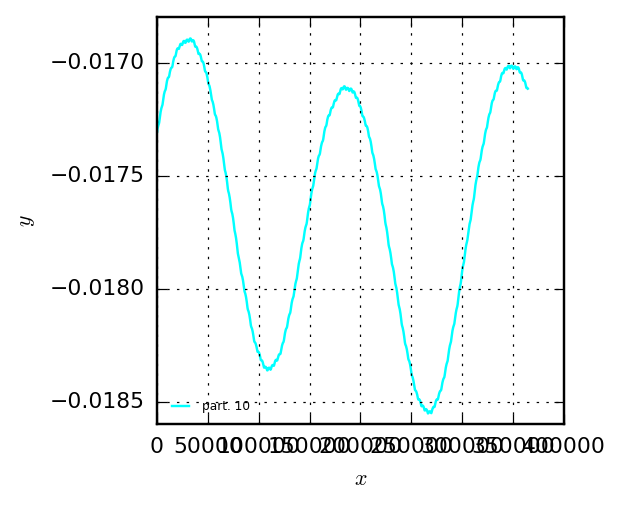

In [363]:
plot_pretty()
#c = ['slateblue', 'red', 'green','dimgrey','yellow','magenta','blue','black','brown','cyan']
#plt.xscale('log'); plt.yscale('log')
#plt.xlim(t0+1.e-6,tf); plt.ylim(y0+1.e-6,3.)
plt.figure(figsize=(3,3))
plt.xlabel('$x$'); plt.ylabel('$y$')
plt.plot(timelist, total , lw=1, c=c[i], alpha=1., label='part. %s'%(i+1))
plt.grid()
plt.legend(frameon=False, loc='lower left', fontsize=5)   
plt.show()

The solar system here looks fairly stable, apart from a slight lowering of energy towards 1000 years in time. I was able to access 1000 earth years, beyond which python slows down. The periodicity can be understood to be mostly from symplecticity of the numerical ODE solver. 

In [373]:
#Distances to the sun

dist = np.zeros((len(timelist),N))

for i in range(N):
    for j in range(len(timelist)):
        dist_norm = np.sqrt((positions[j,i,0] - positions[j,-1,0])**2 + (positions[j,i,1] - positions[j,-1,1])**2 + (positions[j,i,2] - positions[j,-1,2])**2)
        dist[j][i]=dist_norm
        
print dist

[[  0.44006879   0.72644178   0.98727585 ...,  29.96988913  32.76754481
    0.        ]
 [  0.46614385   0.72764564   0.9857342  ...,  29.96961342  32.77364576
    0.        ]
 [  0.46709364   0.72880563   0.98471788 ...,  29.96933857  32.77975102
    0.        ]
 ..., 
 [  0.39433865   0.73157823   0.99054704 ...,  29.80594151  39.63509301
    0.        ]
 [  0.44023304   0.73155837   0.99315614 ...,  29.80592195  39.64207717
    0.        ]
 [  0.46623782   0.73120798   0.99605709 ...,  29.80590357  39.64906023
    0.        ]]


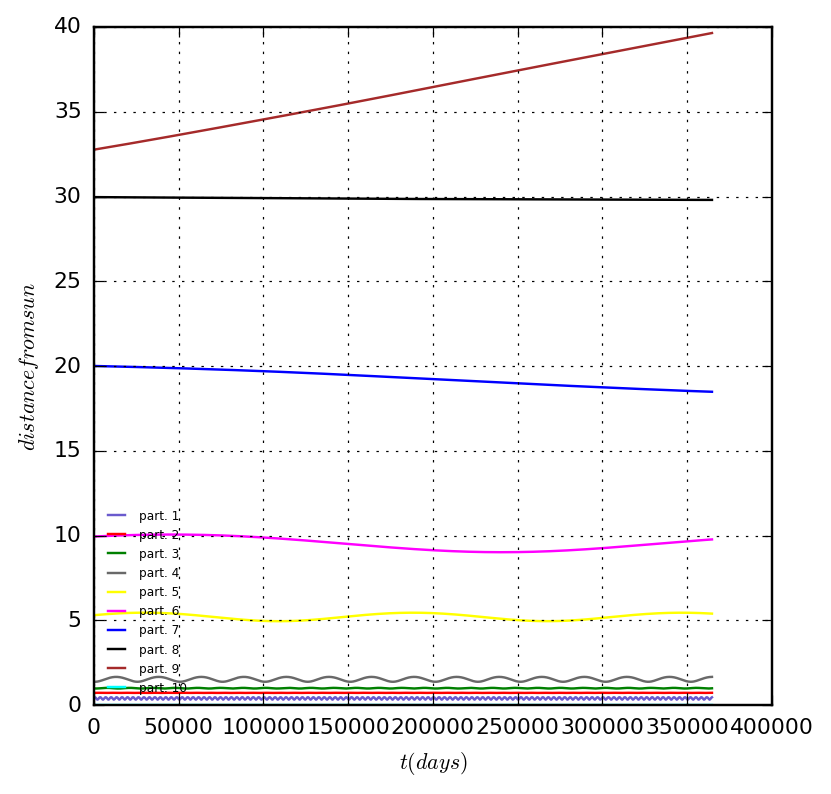

In [378]:
plot_pretty()
c = ['slateblue', 'red', 'green','dimgrey','yellow','magenta','blue','black','brown','cyan']
#plt.xscale('log'); plt.yscale('log')
#plt.xlim(t0+1.e-6,tf); plt.ylim(y0+1.e-6,3.)
plt.figure(figsize=(5,5))
plt.xlabel('$t(days)$'); plt.ylabel('$distance from sun$')
for i in range(N):
    plt.plot(timelist, dist[:,i] , lw=1, c=c[i], alpha=1., label='part. %s'%(i+1))
plt.grid()
plt.legend(frameon=False, loc='lower left', fontsize=5)   
plt.show()

Because my timesteps here are every year (I only pickled 1 point every 365 days), it seems that pluto's orbit is getting further away, which is a pure numerical artefact since its infact oscillating, like most other planets. 

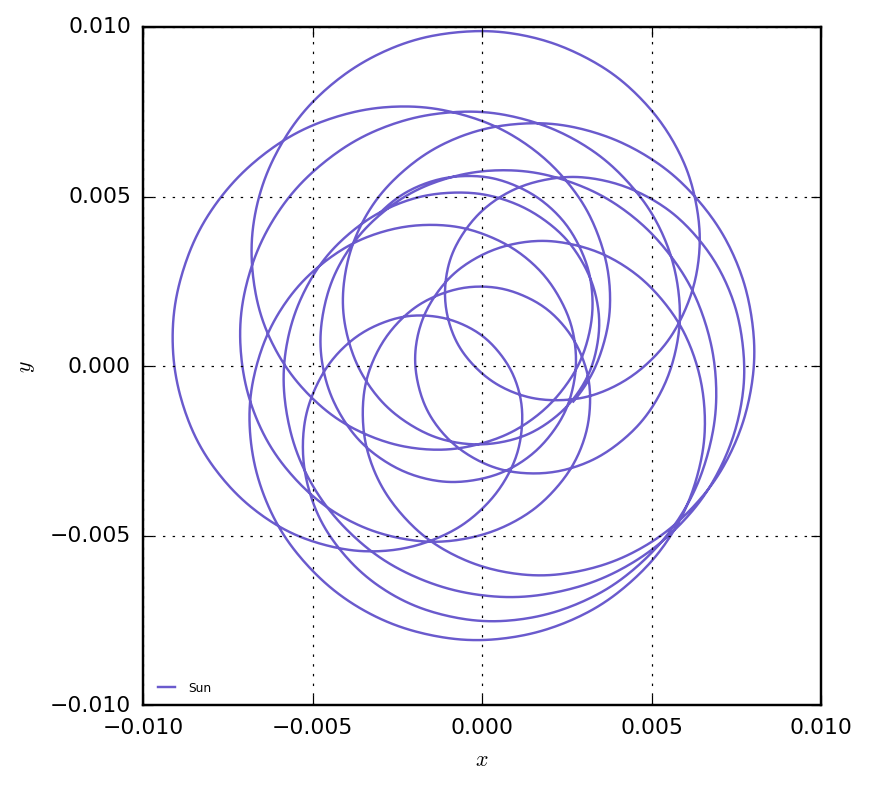

In [389]:
plot_pretty()
c = ['slateblue', 'red', 'green','dimgrey','yellow','magenta','blue','black','brown','cyan']
#plt.xscale('log'); plt.yscale('log')
#plt.xlim(t0+1.e-6,tf); plt.ylim(y0+1.e-6,3.)
plt.figure(figsize=(5,5))
plt.xlabel('$x$'); plt.ylabel('$y$')
plt.plot(positions[:5000,-1,0], positions[:5000,-1,1] , lw=1, c='slateblue', alpha=1., label='Sun')
plt.grid()
plt.legend(frameon=False, loc='lower left', fontsize=5)   
plt.show()

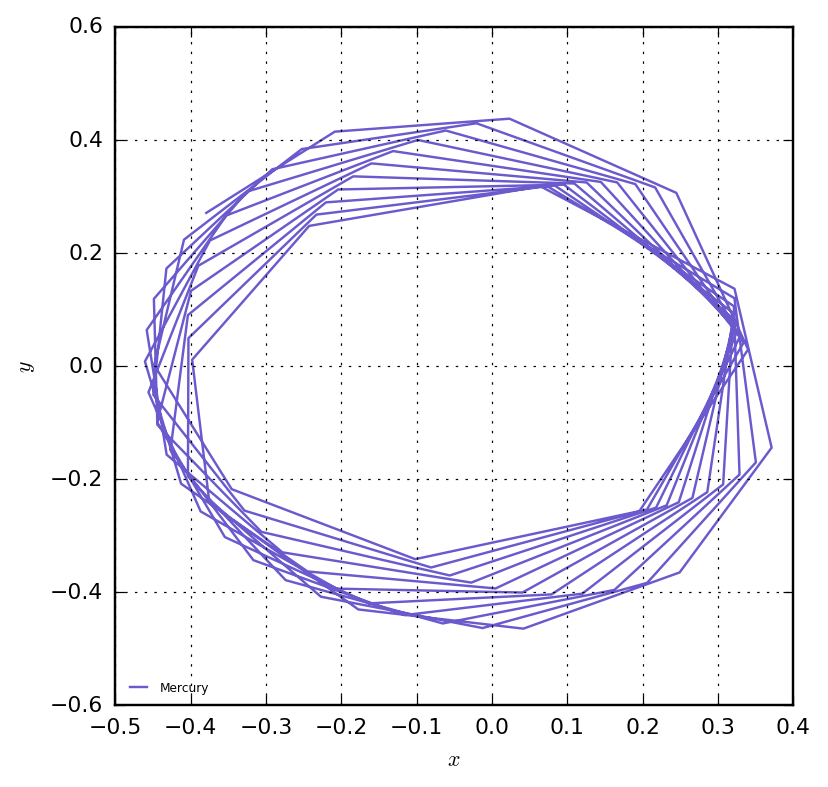

In [397]:
plot_pretty()
c = ['slateblue', 'red', 'green','dimgrey','yellow','magenta','blue','black','brown','cyan']
#plt.xscale('log'); plt.yscale('log')
#plt.xlim(t0+1.e-6,tf); plt.ylim(y0+1.e-6,3.)
plt.figure(figsize=(5,5))
plt.xlabel('$x$'); plt.ylabel('$y$')
plt.plot(positions[:100,0,0], positions[:100,0,1], lw=1, c='slateblue', alpha=1., label='Mercury')
plt.grid()
plt.legend(frameon=False, loc='lower left', fontsize=5)   
plt.show()

Since I can draw multiple ellipses with multiple ellipticities on this plot, theoretically I can claim that mercury's orbit is precessing. *** GR solves this, since our accvec2 solver is Newtonian. [VS:] So, why it is precessing then? See solutions. ***